In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import pickle

In [3]:
df = pd.read_csv("./processed_data.csv")
df.head()

,text,label
0,feel rather rotten ambitious right,sadness
1,update blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,leave bouquet red yellow tulips arm feel sligh...,joy
4,feel little vain one,sadness


In [4]:
#Spliting data values and target values
x = df['text']
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split (x,y, test_size=0.33, random_state=1)

### Count Vectorizer

In [6]:
# Create a CountVectorizer to convert text into a numerical representation and removing stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

### Checking for all the classifiers

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score

In [9]:
classifiers = [
    KNeighborsClassifier(15),
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    SGDClassifier(),
    MultinomialNB()
]

In [10]:
classifier_names = []
f1_scores = []

for clf in classifiers:
    clf.fit(X_train_vectorized, y_train)
    pred=clf.predict(X_test_vectorized)

    f1 = f1_score(y_test, pred, average='weighted')

    classifier_names.append(str(clf))
    f1_scores.append(f1)
    
    print(clf, f1)

KNeighborsClassifier(n_neighbors=15) 0.5251640323779103
SVC() 0.8176668008357248
DecisionTreeClassifier() 0.8111603853956816
ExtraTreesClassifier() 0.8737038846174973
RandomForestClassifier() 0.8635378982401726
AdaBoostClassifier() 0.20817921607709883
SGDClassifier() 0.8685161667660614
MultinomialNB() 0.7402589696001602


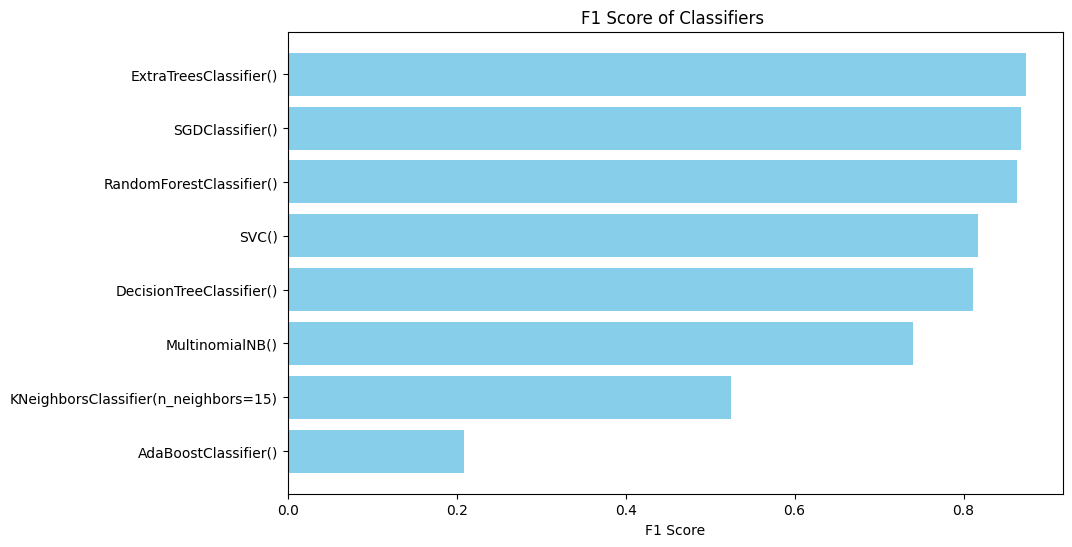

In [12]:
sorted_results = sorted(zip(classifier_names, f1_scores), key=lambda x: x[1], reverse=True)
sorted_classifier_names, sorted_f1_scores = zip(*sorted_results)

plt.figure(figsize=(10, 6))
plt.barh(sorted_classifier_names, sorted_f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score of Classifiers ')
plt.gca().invert_yaxis() 
plt.show()

### Extra Trees Classifier - 0.877

In [8]:
etc = ExtraTreesClassifier()
etc.fit(X_train_vectorized, y_train)
y_pred = etc.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8741713401309015


In [10]:
# etc = ExtraTreesClassifier(min_samples_split=5)
# etc.fit(X_train_vectorized, y_train)
# y_pred = etc.predict(X_test_vectorized)
# accuracy = f1_score(y_test, y_pred,average='weighted')
# print("Accuracy:", accuracy)

#### Hyperparameter Tuning

In [11]:
# from sklearn.model_selection import GridSearchCV

# etc = ExtraTreesClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='f1_weighted')

# grid_search.fit(X_train_vectorized, y_train)

# print("Best Parameters:", grid_search.best_params_)

# best_etc = grid_search.best_estimator_

# y_pred = best_etc.predict(X_test_vectorized)

# accuracy = f1_score(y_test, y_pred, average='weighted')
# print("Best Model Accuracy:", accuracy)

### SGD Classifier- 0.8755

In [15]:
sgd = SGDClassifier(alpha = 0.001, loss =  'modified_huber', max_iter =  1000, penalty = 'elasticnet')
sgd.fit(X_train_vectorized, y_train)
y_pred = sgd.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8755651524970143


In [13]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier

# # Instantiate SGDClassifier
# sgd = SGDClassifier()

# # Define the parameter grid
# param_grid = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],  # Loss function
#     'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
#     'penalty': ['l2', 'l1', 'elasticnet'],  # Penalty term
#     'max_iter': [1000, 1500, 2000],  # Maximum number of iterations
# }

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, scoring='f1_weighted')

# # Fit the grid search to the data
# grid_search.fit(X_train_vectorized, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_sgd = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_sgd.predict(X_test_vectorized)

# # Calculate accuracy
# accuracy = f1_score(y_test, y_pred, average='weighted')
# print("Best Model F1 Score:", accuracy)


C:\Users\Soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Soumya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

Best Parameters: {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best Model F1 Score: 0.8744559760624578


#### Hyperparameter Tuning

In [12]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# etc = ExtraTreesClassifier()

# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': [None] + list(np.random.randint(1, 50, 10)),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
# }

# random_search = RandomizedSearchCV(estimator=etc, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)

# random_search.fit(X_train_vectorized, y_train)

# print("Best Parameters:", random_search.best_params_)

# best_etc = random_search.best_estimator_

# y_pred = best_etc.predict(X_test_vectorized)

# accuracy = f1_score(y_test, y_pred, average='weighted')
# print("Best Model Accuracy:", accuracy)

### Random Forest Classifier - 0.872

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train_vectorized, y_train)
y_pred = rfc.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.8627248765439679


In [17]:
rfc = RandomForestClassifier(min_samples_split=15)
rfc.fit(X_train_vectorized, y_train)
y_pred = rfc.predict(X_test_vectorized)
accuracy = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)

Accuracy: 0.869391076292237


### Predicting

In [13]:
new_text_entry = "Im having a very good time!! but i think the overall experience is slightly tragic, dont you think?"

new_text_entry_vectorized = vectorizer.transform([new_text_entry])

predicted_class = etc.predict(new_text_entry_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: ['sadness']


In [17]:
new_text_entry = "I am very scared for the exams. I fear they wont go good"

new_text_entry_vectorized = vectorizer.transform([new_text_entry])

predicted_class = etc.predict(new_text_entry_vectorized)

print("Predicted Class:", predicted_class)

Predicted Class: ['fear']


Confusion Matrix:
[[ 763   21   26    4   60    3]
 [  28  675    7    1   29   52]
 [  27   27 1961   84   74   38]
 [   7    8  109  406   27    1]
 [  61   42   45    6 1747   11]
 [   0   27   14    1    6  202]]

Classification Report:
              precision    recall  f1-score   support

       anger       0.86      0.87      0.87       877
        fear       0.84      0.85      0.85       792
         joy       0.91      0.89      0.90      2211
        love       0.81      0.73      0.77       558
     sadness       0.90      0.91      0.91      1912
    surprise       0.66      0.81      0.73       250

    accuracy                           0.87      6600
   macro avg       0.83      0.84      0.83      6600
weighted avg       0.87      0.87      0.87      6600



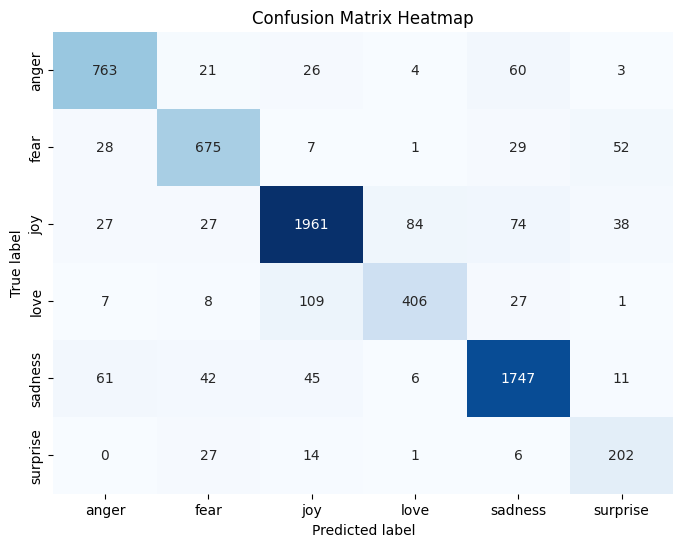

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score using classification_report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
input_text = "i am feeling pretty wonderful. But yesterday was a little sad, with the weather being so terrible. I'm surprised its the not the same today"
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', input_text)

# Create a dictionary to store emotion counts
emotion_count = {'anger': 0, 'fear': 0, 'sadness': 0, 'love': 0, 'joy': 0 , 'surprise':0}  

# Process each sentence
for sentence in sentences:
    # Preprocess the sentence (optional, depending on your data)
    # processed_sentence = preprocess_function(sentence)

    # Transform the sentence
    sentence_vectorized = vectorizer.transform([sentence])

    # Predict emotion for the sentence
    emotion_prediction = etc.predict(sentence_vectorized)[0]

    # Update the emotion count
    emotion_count[emotion_prediction] += 1
    # print(sentence, emotion_prediction)

# Print the results
for emotion, count in emotion_count.items():
    print(f"{emotion}: {count}")

anger: 0
fear: 0
sadness: 1
love: 0
joy: 1
surprise: 1


### Make a Pickle File

In [9]:
# Dumping vectorizer as Pickle

with open('../../App/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [10]:
with open('../../App/model.pkl', 'wb') as file:
    pickle.dump(etc, file)